### 3.Pandas - kluczowy pakiet do danych tabelarycznych
- Wczytywanie danych tabelarycznych (CSV, TSV, XLS)
- Operacje na kolumnach i wierszach
- Filtrowanie i procesowanie danych
- Odczytywanie danych statystycznych
- Modyfikacja danych z użyciem funkcji pythonowych
- Agregacja, podobieństwa do SQL
- Pandas Profiling - raporty

Pandas to popularna biblioteka programistyczna w języku Python, która jest używana do manipulacji i analizy danych. Jest to potężne narzędzie, które ułatwia wczytywanie, przekształcanie, eksplorację i analizę danych w formie tabelarycznej, takich jak arkusze kalkulacyjne lub bazy danych.

##### Główne cechy i funkcje biblioteki Pandas:

1. Struktury danych: Pandas wprowadza dwie główne struktury danych: Series i DataFrame.

- Series: To jednowymiarowa tablica danych, podobna do kolumny w arkuszu kalkulacyjnym lub kolumny w bazie danych. Series można traktować jako uporządkowany zestaw danych z indeksem.

- DataFrame: To dwuwymiarowa struktura danych, która przypomina tabelę lub arkusz kalkulacyjny. DataFrame składa się z kolumn i wierszy, a każda kolumna może zawierać różne typy danych.

2. Wczytywanie i zapisywanie danych: Pandas umożliwia wczytywanie danych z różnych źródeł, takich jak pliki CSV, Excel, SQL, JSON i wiele innych. Możesz również zapisywać dane do tych formatów.

3. Indeksowanie i selekcja danych: Pandas oferuje różnorodne mechanizmy indeksowania i selekcji danych, co pozwala na dostęp do konkretnych kolumn, wierszy lub komórek danych w bardzo elastyczny sposób.

4. Operacje na danych: Biblioteka umożliwia wykonywanie różnych operacji na danych, takich jak filtrowanie, sortowanie, grupowanie, łączenie i wiele innych. Możesz także przeprowadzać operacje matematyczne na danych w sposób efektywny.

5. Obsługa brakujących danych: Pandas oferuje narzędzia do radzenia sobie z danymi brakującymi, takie jak usuwanie lub uzupełnianie brakujących wartości.

6. Analiza i eksploracja danych: Biblioteka ułatwia eksplorację danych poprzez obliczanie statystyk opisowych, generowanie wykresów i wizualizacji danych.

7. Obsługa szeregów czasowych: Pandas posiada wsparcie dla operacji na szeregach czasowych, co jest przydatne w analizie danych związanych z czasem.

8. Integracja z innymi narzędziami: Pandas można łatwo łączyć z innymi bibliotekami do analizy danych i uczenia maszynowego, takimi jak NumPy, SciPy, Matplotlib, scikit-learn i wiele innych.

9. Wsparcie społeczności: Pandas posiada aktywną społeczność użytkowników i deweloperów, co oznacza, że istnieje wiele dostępnych źródeł, tutoriali i materiałów do nauki.



##### Strona internetowa
- https://pandas.pydata.org/

##### Dokumentacja
- https://pandas.pydata.org/pandas-docs/stable/

##### Polecana strona
- https://www.dataschool.io/easier-data-analysis-with-pandas/

In [10]:
# pip install pandas

import pandas as pd
pd.__version__
import numpy as np

### `pd.Series()` - Tablica jednowymiarowa zawierająca dane oraz ich indeksy
Series jest jednowymiarową tablicą z etykietowanym indeksem, która może przechowywać dowolny typ danych – liczby, tekst, wartości logiczne, daty itp. Jest to fundament, na którym buduje się bardziej złożone struktury danych w Pandas.

In [2]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [3]:
s = pd.Series([1,2,3], index=['a','b','c'])
s

a    1
b    2
c    3
dtype: int64

In [ ]:
print('Powiedz "Cześć"')
print("Powiedz 'Cześć'") # dygresja o cydzysłowach :)

Powiedz "Cześć"
Powiedz 'Cześć'


In [9]:
s = pd.Series(data=[True, False, True])
s

0     True
1    False
2     True
dtype: bool

In [12]:
s = pd.Series(np.arange(1,11), index=pd.date_range(start='20251118', periods=10))
s

2025-11-18     1
2025-11-19     2
2025-11-20     3
2025-11-21     4
2025-11-22     5
2025-11-23     6
2025-11-24     7
2025-11-25     8
2025-11-26     9
2025-11-27    10
Freq: D, dtype: int64

In [13]:
s.dtype

dtype('int64')

Atrybut z indeksami jest obiektem typu `pd.Index`:

In [14]:
s.index

DatetimeIndex(['2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21',
               '2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
s.values # będziemy często używać

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Series vs tablica NumPy

Series uogólnia jednowymiarową tablicę NumPy:
* tablica NumPy posiada wewnętrzną indeksację w stylu Pythona (*implicit index*);
* Series posiada wewnętrzną indeksację w stylu Pythona plus indeksację za pomocą etykiet.

In [21]:
s = pd.Series([3, 1, 2.71, -10], index=['a', 'b', 'c', 'd'])
s

a     3.00
b     1.00
c     2.71
d   -10.00
dtype: float64

In [24]:
s['c']

np.float64(2.71)

Indeks etykiet może:
* nie zachowywać kolejności,
* posiadać luki,
* posiadać powtórzenia.

In [25]:
s = pd.Series([3, 1, 2.71, -10, 50], index=[3, 2, 5, 2, 100])
s

3       3.00
2       1.00
5       2.71
2     -10.00
100    50.00
dtype: float64

In [26]:
s[2]

2     1.0
2   -10.0
dtype: float64

## Series jako rodzaj słownika

Klucze słownika przechodzą na etykiety podczas przekształcania słownika na obiekt Series:

In [27]:
ludność_dict = {'Polska': 38501,
                'Czechy': 10221,
                'Szwecja': 9045,
                'Niemcy': 82370,
                'Litwa': 3565}

ludność = pd.Series(ludność_dict)
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

In [ ]:
ludność['Polska']

np.int64(38501)

In [ ]:
ludność.Polska # jak pisać żeby używać tej notacji (z _)

np.int64(38501)

## Selekcja elementów z obiektu Series

Obiekt Series ma równocześnie cechy słownika i jednowymiarowej tablicy. 

Niektóre wzorce dostępu do elementów naśladują te ze słownika, inne te z tablicy jednowymiarowej.

In [30]:
ludność.keys()

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

In [31]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
dtype: int64

In [32]:
ludność['Grecja'] = 10423
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10423
dtype: int64

Series jako tablica jednowymiarowa pozwala na dostęp do wartości poprzez:
* wycinki,
* maskowanie,
* wymyślne indeksowanie.

In [33]:
# Wycinek indeksów z poziomu etykiet
ludność['Czechy':'Niemcy'] # Prawy kraniec zaliczony!

Czechy     10221
Szwecja     9045
Niemcy     82370
dtype: int64

In [34]:
# Wycinek wewnętrznych indeksów Pythona
ludność[1:3] # Prawie kraniec wykluczony!

Czechy     10221
Szwecja     9045
dtype: int64

In [ ]:
ludność[(ludność < 10000) & (ludność > 5000)] # dwa warunki

Szwecja    9045
dtype: int64

In [43]:
# Indeksowanie wymyślne (fancy indexing), indeks etykiet
ludność[['Polska', 'Grecja']]

Polska    38501
Grecja    10423
dtype: int64

In [45]:
ludność

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Grecja     10423
dtype: int64

In [46]:
ludność.iloc[[0, 2, 4]]

Polska     38501
Szwecja     9045
Litwa       3565
dtype: int64

## Zagadka

In [47]:
s = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
s

1    a
2    b
3    c
dtype: object

Jaka wartość kryje się pod `s[2]`? Co zwróci `s[1:3]`?

In [ ]:
s[2] # z poziomu nazw etykiet

'b'

In [ ]:
s[1:3] # wycinek po indexach wewnętrzych 

2    b
3    c
dtype: object

## Indeksery `loc`, `iloc`

* Atrybut `loc` zawsze odnosi się do indeksów z poziomu etykiet.
* Atrybut `iloc` zawsze odnosi się do indeksów wewnętrznych Pythona, czyli do zwykłej numeracji całkowitoliczbowej od zera w górę.

In [50]:
s.iloc[1:3]

2    b
3    c
dtype: object

In [53]:
s

1    a
2    b
3    c
dtype: object

In [ ]:
s.iloc[0] # indeks wewnętrzny Pythona

'a'

In [ ]:
s.loc[1] # indeks etykiet

'a'

In [57]:
#Statystyki

In [58]:
ceny_akcji = pd.Series(data={'Orlen': 70, 'PZU': 30, 'KGHM': 100})
ceny_akcji

Orlen     70
PZU       30
KGHM     100
dtype: int64

In [59]:
ceny_akcji.count()

np.int64(3)

In [60]:
ceny_akcji.value_counts()

70     1
30     1
100    1
Name: count, dtype: int64

In [61]:
ceny_akcji.mean()

np.float64(66.66666666666667)

In [62]:
ceny_akcji.sum()

np.int64(200)

In [63]:
ceny_akcji.min()

np.int64(30)

In [64]:
np.min(ceny_akcji)

np.int64(30)

In [65]:
ceny_akcji.describe()

count      3.000000
mean      66.666667
std       35.118846
min       30.000000
25%       50.000000
50%       70.000000
75%       85.000000
max      100.000000
dtype: float64

In [67]:
ceny_akcji

Orlen     70
PZU       30
KGHM     100
dtype: int64

In [66]:
ceny_akcji.nlargest(2)

KGHM     100
Orlen     70
dtype: int64

In [68]:
ceny_akcji.nsmallest(2)

PZU      30
Orlen    70
dtype: int64

In [69]:
ceny_akcji.rank()

Orlen    2.0
PZU      1.0
KGHM     3.0
dtype: float64

In [74]:
ceny_akcji.sort_values(ascending=False)

KGHM     100
Orlen     70
PZU       30
dtype: int64

## `pd.Series()`

Funkcja `pd.Series()` pozwala na tworzenie obiektów Series wg. schematu
```python
pd.Series(dane, index=index)
```
Parametr `index` jest opcjonalny, parametr `dane` może przyjmować rozmaitą postać.

In [75]:
pd.Series(ceny_akcji)

Orlen     70
PZU       30
KGHM     100
dtype: int64

### `pd.DataFrame()` - Dwuwymiarowa tabela, w której kolumnami są obiekty Series.
pd.DataFrame() jest jedną z najbardziej wszechstronnych i podstawowych struktur danych oferowanych przez bibliotekę Pandas. DataFrame to dwuwymiarowa tablica danych, która może przechowywać dane o różnych typach (liczby, tekst, wartości logiczne, daty itp.) w kolumnach. Struktura ta jest podobna do arkusza kalkulacyjnego lub tabeli relacyjnej bazy danych, co czyni ją niezwykle użyteczną do analizy danych.

**W analizie danych DataFrame jest często przedstawiana jako tabela, w której kolumny to zmienne a wiersze to obserwacje.**

In [101]:
ludność_dict = {'Czechy': 10221,
                'Szwecja': 9045,
                'Litwa': 3565,
                'Polska': 38501,}

ludność = pd.Series(ludność_dict)
ludność

Czechy     10221
Szwecja     9045
Litwa       3565
Polska     38501
dtype: int64

In [102]:
powierzchnia_dict = {'Polska': 322.6,
                     'Czechy': 78.9,
                     'Szwecja': 450,
                     'Niemcy': 357,
                     'Litwa': 65.3}

powierzchnia = pd.Series(powierzchnia_dict)
powierzchnia

Polska     322.6
Czechy      78.9
Szwecja    450.0
Niemcy     357.0
Litwa       65.3
dtype: float64

In [103]:
kraje = pd.DataFrame({'powierzchnia': powierzchnia, 'ludność': ludność})
kraje

,powierzchnia,ludność
Czechy,78.9,10221.0
Litwa,65.3,3565.0
Niemcy,357.0,NaN
Polska,322.6,38501.0
Szwecja,450.0,9045.0


## DataFrame uogólnia tablicę 2D NumPy

Podobnie jak Series obiekty DataFrame posiadają dwa poziomy indeksów dla wierszy: 
* wewnętrzny z numeracją liczbami całkowitymi od zera,
* zbudowany z etykiet.

In [84]:
kraje.index

Index(['Polska', 'Czechy', 'Szwecja', 'Niemcy', 'Litwa'], dtype='object')

In [86]:
kraje.columns

Index(['powierzchnia', 'ludność'], dtype='object')

In [87]:
kraje['ludność']

Polska     38501
Czechy     10221
Szwecja     9045
Niemcy     82370
Litwa       3565
Name: ludność, dtype: int64

In [91]:
kraje.loc['Polska']

powierzchnia      322.6
ludność         38501.0
Name: Polska, dtype: float64

## Sposoby konstrukcji obiektów DataFrame

Z obiektu Series:

In [92]:
pd.DataFrame(ludność, columns=['ludność'])

,ludność
Polska,38501
Czechy,10221
Szwecja,9045
Niemcy,82370
Litwa,3565


In [93]:
list_dict = [{'a': 1, 'b': 2, 'c': 100},
             {'b': 10, 'c': 'Ala'},
             {'a': 0, 'b': 0, 'c': 1, 'd': 2}]
pd.DataFrame(list_dict)

,a,b,c,d
0,1.0,2,100,NaN
1,NaN,10,Ala,NaN
2,0.0,0,1,2.0


In [94]:
pd.DataFrame({'ludność': ludność,
              'powierzchnia': powierzchnia})

,ludność,powierzchnia
Polska,38501,322.6
Czechy,10221,78.9
Szwecja,9045,450.0
Niemcy,82370,357.0
Litwa,3565,65.3


In [95]:
import numpy as np
arr = np.arange(10).reshape(5, 2)
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [96]:
pd.DataFrame(arr, index=['a', 'b', 'c', 'd', 'e'],
             columns=['X', 'Y'])

,X,Y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [97]:
kraje

,powierzchnia,ludność
Polska,322.6,38501
Czechy,78.9,10221
Szwecja,450.0,9045
Niemcy,357.0,82370
Litwa,65.3,3565


In [105]:
kraje.index

Index(['Czechy', 'Litwa', 'Niemcy', 'Polska', 'Szwecja'], dtype='object')

## Index

Cechy obiektu typu Index:
* niezmienny (*immutable*),
* uporządkowany,
* może zawierać powtórzenia.

In [104]:
ind = pd.Index([2, 4, 6, 4, 4, 10, 25])
ind

Index([2, 4, 6, 4, 4, 10, 25], dtype='int64')

In [107]:
ind[0]

np.int64(2)

In [108]:
ind[-1]

np.int64(25)

In [112]:
ind[::2]

Index([2, 6, 4, 25], dtype='int64')

In [114]:
ind[0:5:2]

Index([2, 6, 4], dtype='int64')

In [115]:
ind.ndim, ind.shape, ind.size, ind.dtype

(1, (7,), 7, dtype('int64'))

In [119]:
kraje.reset_index(inplace=True)

In [121]:
kraje.set_index('index', inplace=True)
kraje

,powierzchnia,ludność
index,,
Czechy,78.9,10221.0
Litwa,65.3,3565.0
Niemcy,357.0,NaN
Polska,322.6,38501.0
Szwecja,450.0,9045.0


In [123]:
kraje['Gęstość zaludnienia'] = kraje['ludność'] / kraje['powierzchnia']

In [126]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [127]:
# Maskowanie
kraje[(kraje.powierzchnia > 100) & (kraje['Gęstość zaludnienia'] < 200)]

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [131]:
kraje['Gęstość zaludnienia']

index
Czechy     129.543726
Litwa       54.594181
Niemcy            NaN
Polska     119.345939
Szwecja     20.100000
Name: Gęstość zaludnienia, dtype: float64

In [132]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


In [133]:
kraje.describe()

,powierzchnia,ludność,Gęstość zaludnienia
count,5.000000,4.00000,4.000000
mean,254.760000,15333.00000,80.895962
std,173.202029,15715.31669,52.386189
min,65.300000,3565.00000,20.100000
25%,78.900000,7675.00000,45.970636
50%,322.600000,9633.00000,86.970060
75%,357.000000,17291.00000,121.895386
max,450.000000,38501.00000,129.543726


In [135]:
kraje.isna().sum()

powierzchnia           0
ludność                1
Gęstość zaludnienia    1
dtype: int64

In [136]:
kraje.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Czechy to Szwecja
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   powierzchnia         5 non-null      float64
 1   ludność              4 non-null      float64
 2   Gęstość zaludnienia  4 non-null      float64
dtypes: float64(3)
memory usage: 332.0+ bytes


In [140]:
kraje = kraje.reset_index() # resetuje index

In [145]:
kraje = kraje.set_index('index')

In [147]:
kraje

,powierzchnia,ludność,Gęstość zaludnienia
index,,,
Czechy,78.9,10221.0,129.543726
Litwa,65.3,3565.0,54.594181
Niemcy,357.0,NaN,NaN
Polska,322.6,38501.0,119.345939
Szwecja,450.0,9045.0,20.100000


<Axes: xlabel='index'>

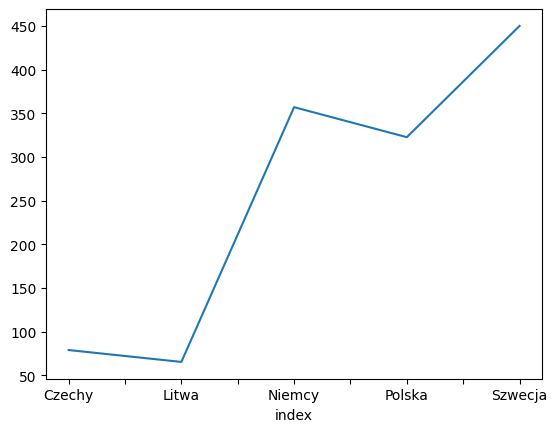

In [151]:
kraje['powierzchnia'].plot()